In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sklearn.tree import DecisionTreeClassifier

# DT (Decision Tree)
Skeleton
- Learning Curve
- Hyperparameter Tuning + Validation Curve + Wall Clock

# Iris

## Get train and test

In [22]:
from functions import preprocess_iris, SEED, generate_learning_curve, generate_validation_curve

In [4]:
from sklearn.metrics import roc_auc_score

In [5]:
X_train, X_test, y_train, y_test = preprocess_iris()

## Baseline Learning Curve

In [6]:
estimator = DecisionTreeClassifier(random_state=SEED)

train roc auc:  1.0
test roc auc: 0.9500000000000001


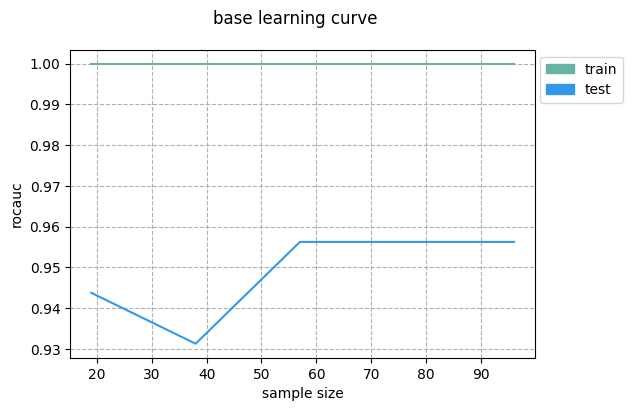

In [7]:
generate_learning_curve(estimator, X_train, y_train, X_test, y_test, "sample size", "base learning curve", "roc_auc_ovo")

## Validation Curve

### Criterion

In [8]:
params = ["gini", "entropy", "log_loss"]
estimators = []
for param in params:
    estimator = DecisionTreeClassifier(random_state=SEED, criterion=param)
    estimators.append(estimator)

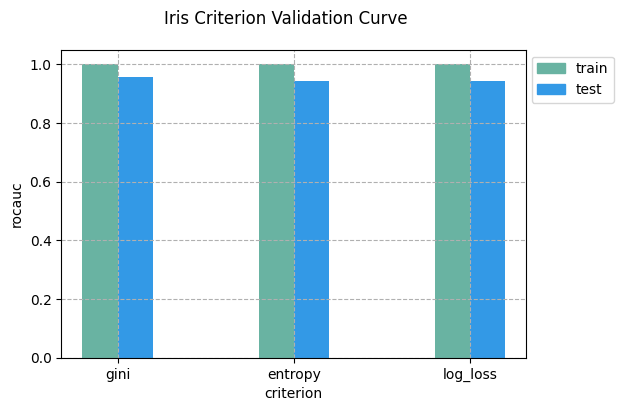

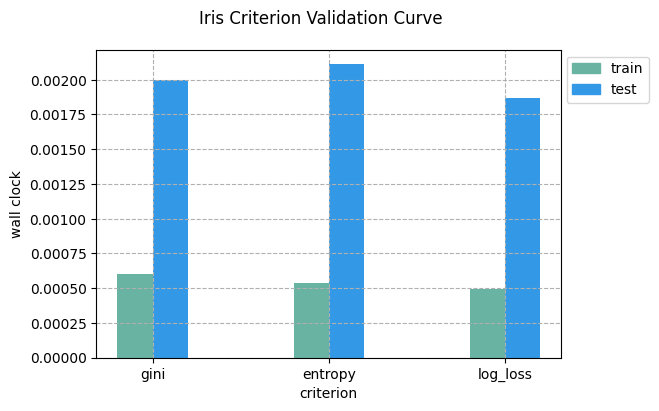

In [9]:
generate_validation_curve(estimators, params, X_train, y_train, X_test, y_test, "criterion", "Iris Criterion Validation Curve",'bar',"roc_auc_ovo")

### Pruning (PRE)

#### Max Depth

In [25]:
params = [1,2,3,4,5,6,7,8,9,10]
estimators = []
for param in params:
    estimator = DecisionTreeClassifier(random_state=SEED, max_depth=param, criterion="log_loss")
    estimators.append(estimator)

In [26]:
generate_validation_curve(estimators, params, X_train, y_train, X_test, y_test, "Max Depth", "Iris Max Depth Validation Curve",'line','roc_auc_ovo')

#### Max leaf Nodes

In [27]:
params = [2,3,4,5,6,7,8,9,10,11]
estimators = []
for param in params:
    estimator = DecisionTreeClassifier(random_state=SEED,max_leaf_nodes=param, max_depth=3, criterion="log_loss")
    estimators.append(estimator)

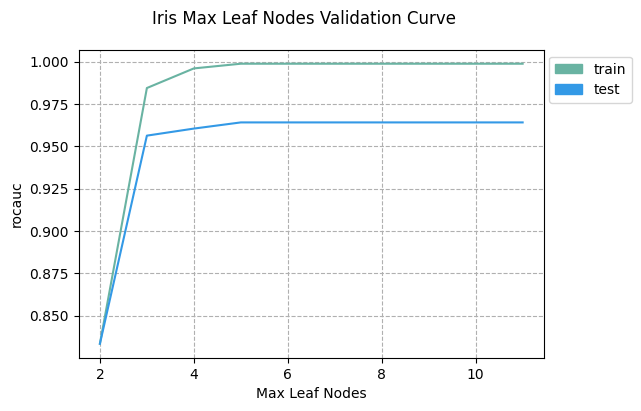

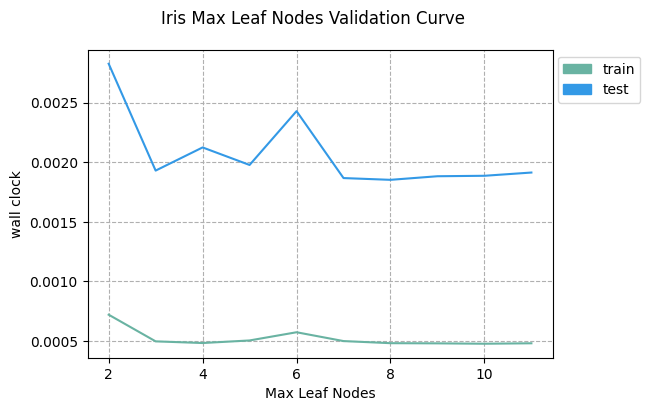

In [28]:
generate_validation_curve(estimators, params, X_train, y_train, X_test, y_test, "Max Leaf Nodes", "Iris Max Leaf Nodes Validation Curve",'line','roc_auc_ovo')

In [29]:
from functions import trigger_validate

In [38]:
estimator = DecisionTreeClassifier(random_state=SEED, criterion="log_loss", max_depth=3,max_leaf_nodes=5)
generate_learning_curve(estimator, X_train, y_train, X_test, y_test, "sample size", "Iris Learning Curve", "roc_auc_ovo")

train wall clock: 0.0005141735076904297
test wall clock: 0.0019371986389160156
train roc auc:  0.9990625
test roc auc: 0.9716666666666667
